In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import gc

In [6]:
gc.collect()


2109

In [7]:
df = pd.read_csv('../data/df.csv')

In [8]:
df.tail()

,site_id,building_id,primary_use,square_feet,meter,timestamp,meter_reading,meter_reading_roll_avg,outlier_ratio,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month
16855059,15,1400,Lodging/residential,21168,1,2016-03-24 09:00:00,4.2706,5.693420,0.750094,1.1,1.1,1017.6,290.0,2.6,9,3,3
16855060,15,1400,Lodging/residential,21168,1,2016-03-24 10:00:00,5.0499,5.706251,0.884977,1.1,1.1,1017.6,0.0,0.0,10,3,3
16855061,15,1400,Lodging/residential,21168,1,2016-03-24 11:00:00,4.6566,5.861043,0.794500,1.7,1.1,1017.3,0.0,0.0,11,3,3
16855062,15,1400,Lodging/residential,21168,1,2016-03-24 12:00:00,15.3753,6.054233,2.539595,1.7,1.7,1016.8,0.0,0.0,12,3,3
16855063,15,1400,Lodging/residential,21168,1,2016-03-24 16:00:00,16.3553,6.632746,2.465842,15.0,4.4,1012.0,160.0,8.2,16,3,3


In [9]:
len(df['primary_use'].value_counts())

16

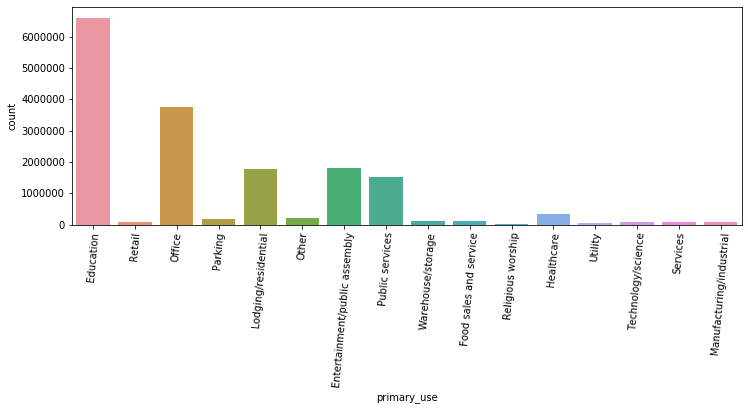

In [10]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=85)
sns.countplot(x=df['primary_use'])

Intially try top 6 and combine others

https://stackoverflow.com/questions/54653356/case-when-function-from-r-to-python

#case_when
conditions = [
    (df["age"].lt(10)),
    (df["age"].ge(10) & df["age"].lt(20)),
    (df["age"].ge(20) & df["age"].lt(30)),
    (df["age"].ge(30) & df["age"].lt(50)),
    (df["age"].ge(50)),
]
choices = ["baby", "kid", "young", "mature", "grandpa"]

df["elderly"] = np.select(conditions, choices)

conditions = [(df['primary_use']=="Education"),
              (df['primary_use']=="Office"),
              (df['primary_use']=="Lodging/residential"),
              (df['primary_use']=="Entertainment/public assembly"),
              (df['primary_use']=="Public services"),
              (df['primary_use']=="Healthcare"),
              (df['primary_use'] not in ["Education","Office","Lodging/residential","Entertainment/public assembly","Public services","Healthcare"])]



choices = ["Education","Office","Lodging/residential","Entertainment/public assembly","Public services","Healthcare","Other"]

df["test"] = np.select(conditions, choices)

In [11]:
y = ["Education","Office","Lodging/residential","Entertainment/public assembly","Public services","Healthcare","Other"]
df['primary_use'] = df['primary_use'].apply(lambda x: "Other" if x not in y else x  )

In [12]:
df['primary_use'].unique()

array(['Education', 'Other', 'Office', 'Lodging/residential',
       'Entertainment/public assembly', 'Public services', 'Healthcare'],
      dtype=object)

In [13]:
df['meter'].unique()

array([0, 1, 3, 2], dtype=int64)

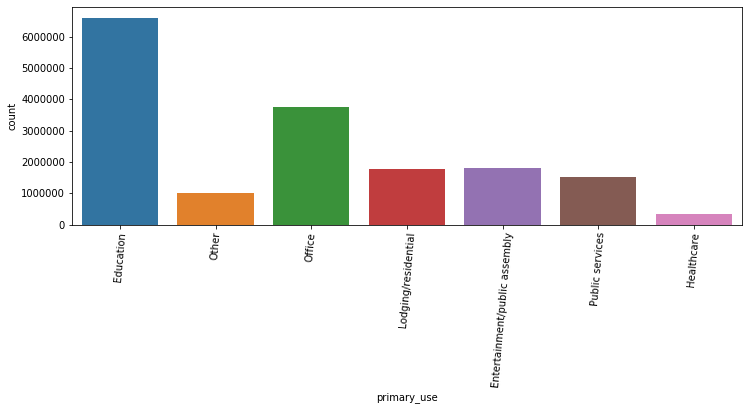

In [14]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=85)
sns.countplot(x=df['primary_use'])

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [16]:
labelencoder_use = LabelEncoder()
#labelencoder_meter = LabelEncoder()

In [17]:
df['primary_use'] = labelencoder_use.fit_transform(df['primary_use'])
#df['meter'] = labelencoder_meter.fit_transform(df['meter'])

In [18]:
df.tail()

,site_id,building_id,primary_use,square_feet,meter,timestamp,meter_reading,meter_reading_roll_avg,outlier_ratio,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month
16855059,15,1400,3,21168,1,2016-03-24 09:00:00,4.2706,5.693420,0.750094,1.1,1.1,1017.6,290.0,2.6,9,3,3
16855060,15,1400,3,21168,1,2016-03-24 10:00:00,5.0499,5.706251,0.884977,1.1,1.1,1017.6,0.0,0.0,10,3,3
16855061,15,1400,3,21168,1,2016-03-24 11:00:00,4.6566,5.861043,0.794500,1.7,1.1,1017.3,0.0,0.0,11,3,3
16855062,15,1400,3,21168,1,2016-03-24 12:00:00,15.3753,6.054233,2.539595,1.7,1.7,1016.8,0.0,0.0,12,3,3
16855063,15,1400,3,21168,1,2016-03-24 16:00:00,16.3553,6.632746,2.465842,15.0,4.4,1012.0,160.0,8.2,16,3,3


In [19]:
onehot_encoder_use = OneHotEncoder(drop='first')
onehot_encoder_meter = OneHotEncoder(drop='first')

In [20]:
X_use = pd.DataFrame(onehot_encoder_use.fit_transform(df.primary_use.values.reshape(-1,1)).toarray())
X_use.rename(columns={0:"Entertainment/public assembly",1:"Healthcare",2:"Lodging/residential",3:"Office",4:"Other",5:"Public Services"}, inplace=True)

X_meter = pd.DataFrame(onehot_encoder_meter.fit_transform(df.meter.values.reshape(-1,1)).toarray())
X_meter.rename(columns={0:"ChilledWater",1:"Steam",2:"HotWater"}, inplace=True)

In [21]:
X_use

,Entertainment/public assembly,Healthcare,Lodging/residential,Office,Other,Public Services
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
16855059,0.0,0.0,1.0,0.0,0.0,0.0
16855060,0.0,0.0,1.0,0.0,0.0,0.0
16855061,0.0,0.0,1.0,0.0,0.0,0.0
16855062,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
X_meter

,ChilledWater,Steam,HotWater
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
16855059,1.0,0.0,0.0
16855060,1.0,0.0,0.0
16855061,1.0,0.0,0.0
16855062,1.0,0.0,0.0


In [23]:
df = df.join(X_use)
df = df.join(X_meter)


In [24]:
df.drop(['primary_use','meter','timestamp'],axis=1,inplace=True)
df.head()

,site_id,building_id,square_feet,meter_reading,meter_reading_roll_avg,outlier_ratio,air_temperature,dew_temperature,sea_level_pressure,wind_direction,...,month,Entertainment/public assembly,Healthcare,Lodging/residential,Office,Other,Public Services,ChilledWater,Steam,HotWater
0,0,1,2720,0.0000,0.690590,0.000000,25.0,20.0,1019.7,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2,5376,0.0000,0.024090,0.000000,25.0,20.0,1019.7,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,20,110272,0.0000,7.215992,0.000000,25.0,20.0,1019.7,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,46,9045,53.2397,54.669061,0.973854,25.0,20.0,1019.7,0.0,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,52,106523,0.0000,1.405271,0.000000,25.0,20.0,1019.7,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16855064 entries, 0 to 16855063
Data columns (total 23 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   site_id                        int64  
 1   building_id                    int64  
 2   square_feet                    int64  
 3   meter_reading                  float64
 4   meter_reading_roll_avg         float64
 5   outlier_ratio                  float64
 6   air_temperature                float64
 7   dew_temperature                float64
 8   sea_level_pressure             float64
 9   wind_direction                 float64
 10  wind_speed                     float64
 11  hour                           int64  
 12  weekday                        int64  
 13  month                          int64  
 14  Entertainment/public assembly  float64
 15  Healthcare                     float64
 16  Lodging/residential            float64
 17  Office                         float64
 18  